# Circuit Complexity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors
from random import shuffle
import matplotlib
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
COLORS = list(mcolors.TABLEAU_COLORS)
shuffle(COLORS)

In [3]:
ROOT = '/Users/jonathanlu/Documents/data_sym/CC'
STATES = ['XY', 'GHZ', 'Cluster']
NUM_DEPTHS = 5
NRUN = 50

losses = np.zeros((len(STATES), NUM_DEPTHS, NRUN))

for i, STATE in enumerate(STATES):
    for DEPTH in range(NUM_DEPTHS):
        name = 'Cluster' if STATE == 'ClusterX' else STATE
        losses[i,DEPTH] = np.load(f'{ROOT}/{STATE}/losses_{DEPTH}_{name}.npy')

losses = (losses >= 0) * losses
losses += 1e-20
losses[STATES.index('GHZ'),1] = losses[STATES.index('GHZ'),0]
    
# bottom = round(NRUN * 0.95) # filter bad runs
# losses = np.sort(losses, axis=-1)[:,:bottom]

In [4]:
x = np.arange(NUM_DEPTHS)
avgs = np.mean(losses, axis=-1)
stdevs = np.std(losses, axis=-1)

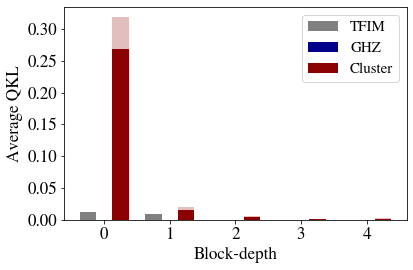

In [5]:
# Plot the data as a bar, 
fig, ax = plt.subplots()
plt.rc('font', size=15)
FONT_SIZE = 17
COLORS = ['grey', 'darkblue', 'darkred']

for i, STATE in enumerate(STATES):
    x_here = x + 0.25*i - 0.25
    ax.bar(x_here, avgs[i], width=0.25, 
           label=STATE if STATE != 'XY' else 'TFIM', color=COLORS[i])
    ax.bar(x_here, stdevs[i], width=0.25, 
           color=COLORS[i], alpha=0.25)

plt.xlabel(r"Block-depth", fontsize=FONT_SIZE)
plt.ylabel('Average QKL', fontsize=FONT_SIZE)
plt.xticks(np.arange(NUM_DEPTHS), fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/jonathanlu/Documents/data_sym/CC.pdf")